In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)


In [7]:
df1 = pd.read_csv('df_transform_zeroes_excluded.csv')
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntWine_PerIncome,MntFruit_PerIncome,MntMeat_PerIncome,MntFish_PerIncome,MntSweet_PerIncome,MntGold_PerIncome,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,Education_2n Cycle,Education_Bachelors,Education_HighSchool,Education_Master,Education_PhD,Dt_Custom_Weekday_0,Dt_Custom_Weekday_1,Dt_Custom_Weekday_2,Dt_Custom_Weekday_3,Dt_Custom_Weekday_4,Dt_Custom_Weekday_5,Dt_Custom_Weekday_6,Dt_Customer_Season_Autumn,Dt_Customer_Season_Spring,Dt_Customer_Season_Summer,Dt_Customer_Season_Winter
0,1957,58138.0,0,0,58,6.453625,4.477337,6.302619,5.147494,4.477337,4.477337,3,8,10,4,7,0,0,0,0,0,0,1,-5.210097,-7.186385,-5.361103,-6.516227,-7.186385,-7.186385,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1954,46344.0,1,1,38,2.397895,0.000000,1.791759,0.693147,0.000000,1.791759,2,1,1,2,5,0,0,0,0,0,0,0,-9.039099,-11.436994,-9.645235,-10.743847,-11.436994,-9.645235,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1965,71613.0,0,0,26,6.054439,3.891820,4.844187,4.709530,3.044522,3.737670,1,8,2,10,4,0,0,0,0,0,0,0,-5.817740,-7.980359,-7.027992,-7.162649,-8.827657,-8.134509,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1984,26646.0,1,0,26,2.397895,1.386294,2.995732,2.302585,1.098612,1.609438,2,2,0,4,6,0,0,0,0,0,0,0,-8.485646,-9.497247,-7.887809,-8.580956,-9.784929,-9.274104,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1981,58293.0,1,0,94,5.153292,3.761200,4.770685,3.828641,3.295837,2.708050,5,5,3,6,5,0,0,0,0,0,0,0,-6.513093,-7.905184,-6.895700,-7.837743,-8.370548,-8.958334,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


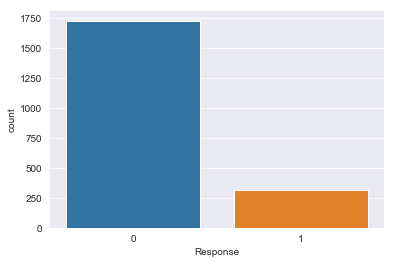

In [8]:
sns.set_style('darkgrid')
sns.countplot(df1.Response)

In [132]:
X = df1.loc[:,df1.columns!='Response']
y = df1.Response

In [133]:
pn=PolynomialFeatures(degree=2,include_bias=False)
pn.fit(X)
columns=pn.get_feature_names(X.columns)
poly_X=pd.DataFrame(pn.transform(X), columns=columns)
poly_X.shape

(2046, 1274)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(poly_X,y,test_size=.2)

In [135]:
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [136]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_sample(X_train,y_train)

In [137]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=100)
selector.fit(X_train, y_train)

SelectKBest(k=100, score_func=<function f_regression at 0x000001824F93EBF8>)

In [138]:
X_train = pd.DataFrame(X_train, columns=poly_X.columns)
X_test= pd.DataFrame(X_test, columns=poly_X.columns)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [139]:
X_train.shape

(2748, 100)

In [140]:
X_test.shape

(410, 100)

In [22]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [25]:
print(metrics.accuracy_score(y_test,dummy_pred))
print(metrics.f1_score(y_test,dummy_pred))

0.8317073170731707
0.0


In [108]:
X_test.shape

(2782, 100)

In [123]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [124]:
print(metrics.accuracy_score(y_test,y_pred_test))
print(metrics.f1_score(y_test, y_pred_test))

0.8341463414634146
0.5903614457831324


In [129]:
# list(zip(X_train.columns,logreg.coef_[0]))

In [146]:
from sklearn.model_selection import RandomizedSearchCV
log = LogisticRegression()
penalty=['l1', 'l2']
lambda_terms=[10,15,25,50,100]
params=dict(C=lambda_terms,penalty=penalty)

In [147]:
lr_gs=RandomizedSearchCV(log,params,cv=5,scoring='f1')
log_model = lr_gs.fit(X_train,y_train)

In [148]:
print('Best Penalty:',log_model.best_estimator_.get_params()['penalty'])
print('Best C:', log_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 25


In [149]:
logreg=LogisticRegression(C=25, penalty='l2')
logreg.fit(X_train,y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [152]:
print(metrics.accuracy_score(y_train,y_pred_train))
print(metrics.f1_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test,y_pred_test))
print(metrics.f1_score(y_test, y_pred_test))

0.8307860262008734
0.8303538854432689
0.8
0.5060240963855421


In [174]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=range(100,1100,100)
criterion = ['entropy','gini']
max_features = ['auto','log2']
max_depth = range(5,16)
min_samples_leaf = range(9,15,1)
min_samples_split = range(2,11,2)
n_jobs=-1
params = dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf, criterion=criterion,max_depth=max_depth, min_samples_split=min_samples_split)
rfc = RandomForestClassifier()

In [175]:
rfc_rs = RandomizedSearchCV(estimator=rfc,param_distributions=params,cv=5,scoring='f1',verbose=10, n_jobs=-1)
rfc_model = rfc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


In [176]:
rfc_model.best_estimator_.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [177]:
rf = RandomForestClassifier(max_depth=13,min_samples_leaf=9,n_estimators=1000,criterion='entropy',min_samples_split=2)
rf.fit(X_train,y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [178]:
print(metrics.accuracy_score(y_train,y_train_pred_rf))
print(metrics.f1_score(y_train, y_train_pred_rf))
print(metrics.accuracy_score(y_test,y_test_pred_rf))
print(metrics.f1_score(y_test, y_test_pred_rf))

0.9425036390101892
0.942461762563729
0.8365853658536585
0.54421768707483


In [195]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
max_depth = range(5,15)
objective = 'binary:logistic'
learning_rate = [.01,.05,.1,.25,.33,.5]
n_estimators = range(500,1100,100)
colsample_bytree = [.1,.25,.33,.5]
reg_alpha = [.01,.1,.25,.5,1,2]
reg_lambda = [1,2,5,7,10]
params = {'max_depth':max_depth,'objective':objective,'n_estimators':n_estimators,'colsample_bytree':colsample_bytree,'reg_alpha':reg_alpha,'reg_lambda':reg_lambda}

In [196]:
xgbc_rs = RandomizedSearchCV(estimator=xgbc,param_distributions=params,cv=5,scoring='f1',verbose=10, n_jobs=-1)
xgbc_model = xgbc_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


XGBoostError: [18:42:40] C:\dev\libs\xgboost\src\objective\objective.cc:23: Unknown objective function i